PyTorch
================

파이토치는 파이썬 기반의 scientific computing package로 아래 독자층을 타겟하고 있다

-  GPU를 이용할 수 있는 NumPy 대체 패키지
-  최고의 유연성과 속도를 제공하는 딥러닝 연구 플랫폼

In [2]:
import numpy as np
import torch

파이토치 시작하기
---------------

### 텐서(Tensors)

텐서는 NumPy의 ndarray와 비슷하며 GPU를 활용한 계산을 부가적으로 제공한다

### 텐서 초기화하기

초기화되지 않은 5x3 tensor 만들기

In [3]:
x = torch.empty(5, 3)
print(x)
print(type(x))

tensor([[ 0.0000e+00,  0.0000e+00,  3.7154e-26],
        [ 3.0819e-41,  1.6153e-25,  3.0819e-41],
        [-8.1561e-05,  4.5708e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])
<class 'torch.Tensor'>


랜덤하게 초기화된 텐서 만들기

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0234, 0.4014, 0.7415],
        [0.6111, 0.3794, 0.3966],
        [0.7697, 0.7530, 0.9253],
        [0.4799, 0.8049, 0.9222],
        [0.4240, 0.3636, 0.0582]])


값이 0이고 dtype이 long인 텐서 만들기

In [7]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


값이 1이고 dtype이 float16인 텐서 만들기

In [8]:
shape = (2,3,)
ones_tensor = torch.ones(shape, dtype = torch.float16)

print(f"Ones Tensor: \n {ones_tensor} \n")

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16) 



이미 존재하는 데이터로 부터 텐서 만들기

In [9]:
data = [[1, 2],[3, 4]]
x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


이미 존재하는 tensor를 이용하여 새로운 텐서 생성하기

이 함수들은 tensor의 새로운 속성 (e.g. dtype, size)을 전달받지 않는한, input tensor의 속성을 그대로 재사용한다.

In [10]:
x = x.new_ones(2, 3)      # override shape
print(x)                  # result has the same dtype

x = torch.randn_like(x, dtype=torch.float)    # override dtype
print(x)                                      # result has the same size

tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[ 1.5980,  1.0121, -0.0861],
        [-0.3909, -0.1519, -1.1356]])


numpy로 부터 tensor 생성하기

In [11]:
np_array = np.array([[1, 2],[3, 4]])
x = torch.from_numpy(np_array)
print(x)

tensor([[1, 2],
        [3, 4]])


Torch Tensor와 NumPy array는 메모리 위치를 공유한다 (Torch Tensor가 CPU 위에 있는 경우)

따라서 둘중 하나의 값을 변경하면 다른것의 값도 변경된다

In [12]:
np.add(np_array, 1, out=np_array)
print(f"numpy: \n{np_array}\n")
print(f"tensor: \n{x}")


numpy: 
[[2 3]
 [4 5]]

tensor: 
tensor([[2, 3],
        [4, 5]])


tensor로 부터 numpy array 가져오기

CPU위에 있는 모든 텐서는 Numpy로 변환거다 역변환하는것을 지원한다 (CharTensor 제외)

In [13]:
a = torch.ones(3, 5)
print(a)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [16]:
b = a.numpy()
print(b)
print(type(b))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<class 'numpy.ndarray'>


In [17]:
a.add_(1)
print(a)
print(b)

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


### 텐서의 속성 (Attributes of tensor)
- size : 데이터 shape
- dtype : 개별 데이터의 자료형
- device : 어느 device (CPU/GPU)위에 있는지

In [18]:
x = torch.rand(3,4)

print(f"Size of tensor: {x.size()}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Tensor is stored on device: {x.device}")

Size of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Tensor is stored on device: cpu


## 텐서 연산 (Operations on tensors)

### 연산의 위치 (Operation locations)

텐서는 ``.to`` 메서드를 이용해 다른 디바이스로 옮길 수 있다

In [19]:
x = torch.rand(3,4)
if torch.cuda.is_available():
    x_gpu = x.to("cuda")
    
    print(f"Shape of tensor: {x_gpu.shape}")
    print(f"Datatype of tensor: {x_gpu.dtype}")
    print(f"Tensor is stored on device: {x_gpu.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Tensor is stored on device: cuda:0


GPU 위에 있는 텐서끼리는 연산을 할 수 있다

In [20]:
if torch.cuda.is_available():
    device = torch.device("cuda")           # a CUDA device object
    y_gpu = torch.ones_like(x, device=device)   # directly create a tensor on GPU
    x_gpu = x.to(device)                        # or just use strings ``.to("cuda")``
    z = x_gpu + y_gpu
    print(z)
    print(z.to("cpu", torch.float16))       # .to를 이용해 dtype도 같이 변환할 수 있다

tensor([[1.5530, 1.2181, 1.6790, 1.1055],
        [1.3457, 1.0296, 1.0571, 1.5997],
        [1.2932, 1.0876, 1.1234, 1.5608]], device='cuda:0')
tensor([[1.5527, 1.2178, 1.6787, 1.1055],
        [1.3457, 1.0293, 1.0566, 1.5996],
        [1.2930, 1.0879, 1.1230, 1.5605]], dtype=torch.float16)


서로 다른 디바이스에 있는 텐서끼리는 연산할 수 없다

In [21]:
x + y_gpu

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


### 산술 연산 (Arithmatic Operations)
PyTorch에는 다양한 연산들이 미리 정의 되어 있으며, 하나의 연산에도 여러 syntax가 존재한다

덧셈: syntax 1

In [22]:
x = torch.ones(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.9114, 1.0353, 1.6423],
        [1.2701, 1.5174, 1.3585],
        [1.4795, 1.6208, 1.7844],
        [1.2195, 1.4747, 1.8187],
        [1.1875, 1.5206, 1.5948]])


덧셈: syntax 2

In [23]:
print(torch.add(x, y))

tensor([[1.9114, 1.0353, 1.6423],
        [1.2701, 1.5174, 1.3585],
        [1.4795, 1.6208, 1.7844],
        [1.2195, 1.4747, 1.8187],
        [1.1875, 1.5206, 1.5948]])


결과를 저장할 텐서를 argument로 전달하기

In [24]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.9114, 1.0353, 1.6423],
        [1.2701, 1.5174, 1.3585],
        [1.4795, 1.6208, 1.7844],
        [1.2195, 1.4747, 1.8187],
        [1.1875, 1.5206, 1.5948]])


in-place 연산

In [25]:
# adds x to y
y.add_(x)
print(y)

tensor([[1.9114, 1.0353, 1.6423],
        [1.2701, 1.5174, 1.3585],
        [1.4795, 1.6208, 1.7844],
        [1.2195, 1.4747, 1.8187],
        [1.1875, 1.5206, 1.5948]])


<div class="alert alert-info"><h4>Note</h4><p>모든 in-place연산의 함수 이름은 ``_``로 끝난다.
    예: ``x.copy_(y)``, ``x.t_()`` 등의 연산은 ``x``의 값을 변경할 것이다.</p></div>

스칼라 곱

In [26]:
x_t = torch.tensor([1, 2, 3], dtype=torch.float32)
c = 10

x_t = x_t * c #broadcasting
print(x_t)

tensor([10., 20., 30.])


행렬 곱

In [27]:
x1 = torch.tensor([[1,2], [3,4]], dtype = torch.float32)
x2 = torch.tensor([[1,2,3],[4,5,6]], dtype = torch.float32)

y1 = torch.matmul(x1, x2) #
y2 = x1.matmul(x2)
y3 = x1 @ x2

y4 = torch.rand_like(y1)
torch.matmul(x1, x2, out=y4)

print(y1)
print(y2)
print(y3)
print(y4)


tensor([[ 9., 12., 15.],
        [19., 26., 33.]])
tensor([[ 9., 12., 15.],
        [19., 26., 33.]])
tensor([[ 9., 12., 15.],
        [19., 26., 33.]])
tensor([[ 9., 12., 15.],
        [19., 26., 33.]])


element-wise 곱

In [28]:
x = torch.tensor([[1,2], [3,4]], dtype = torch.float32)

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = x * x
z2 = x.mul(x)

z3 = torch.rand_like(x)
torch.mul(x, x, out=z3)

print(z1)
print(z2)
print(z3)

tensor([[ 1.,  4.],
        [ 9., 16.]])
tensor([[ 1.,  4.],
        [ 9., 16.]])
tensor([[ 1.,  4.],
        [ 9., 16.]])


집계 함수 (aggregation functions)
다양한 집계 함수들이 이미 정의 되어 있으며 필요할 경우 documentation을 찾아보고 이용한다

집계 후의 텐서 값을 가져오기 위해서는 ``.item()``함수를 이용한다

In [29]:
x = torch.tensor([[1,2], [3,4], [5,6]], dtype = torch.float32)
agg = x.sum(axis = 1)
print(agg)

agg_item = agg[0].item()
print(agg_item)

tensor([ 3.,  7., 11.])
3.0


In [30]:
x = torch.randn(3, 2)
print(x)
print(x[1,1].item())

tensor([[-0.4972, -0.6947],
        [-0.8811, -1.7088],
        [-1.6068, -0.2118]])
-1.7087886333465576


### 인덱싱과 슬라이싱 (indexing and slicing)
Numpy에서 이용하였던 방법을 그대로 모두 이용할 수 있다

In [31]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(f"{x}")
print(f"Shape of tensor: {x.shape}")
print(f"First row: {x[0]}")
print(f"First column: {x[:, 0]}")
print(f"Last column: {x[..., -1]}")


tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
Shape of tensor: torch.Size([4, 3])
First row: tensor([1, 2, 3])
First column: tensor([ 1,  4,  7, 10])
Last column: tensor([ 3,  6,  9, 12])


In [32]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]) #shape : (4, 3)
x[:,1] = 0      # scalar broadcasted to tensor of size (4, 1)
print(x)

tensor([[ 1,  0,  3],
        [ 4,  0,  6],
        [ 7,  0,  9],
        [10,  0, 12]])


In [33]:
x = torch.ones(2,3,4)
sub_tensor = torch.randn(2,4)
x[0,1:3 ,:] = sub_tensor
print(x)

tensor([[[ 1.0000,  1.0000,  1.0000,  1.0000],
         [ 0.1857, -0.3476,  2.0408,  0.0780],
         [-1.1216,  0.9813,  1.8990, -0.3166]],

        [[ 1.0000,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000]]])


In [34]:
x = torch.ones(2,3,4)
sub_tensor = torch.randn(1,4)
x[0, 1:3 ,:] = sub_tensor # tensor with (1,4) shape broadcasted to (2, 4)
print(x)

tensor([[[ 1.0000,  1.0000,  1.0000,  1.0000],
         [-0.1263, -0.0198,  0.0524,  1.3051],
         [-0.1263, -0.0198,  0.0524,  1.3051]],

        [[ 1.0000,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000]]])


### joining

In [35]:
tensor = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[ 1,  2,  3,  1,  2,  3,  1,  2,  3],
        [ 4,  5,  6,  4,  5,  6,  4,  5,  6],
        [ 7,  8,  9,  7,  8,  9,  7,  8,  9],
        [10, 11, 12, 10, 11, 12, 10, 11, 12]])


### Resizing

In [36]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


### Reshaping

In [37]:
x = torch.arange(1, 16)
print(x)
y = x.view(5, 3)
print(y.shape)
print(y)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
torch.Size([5, 3])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


<mark>실습</mark>

아래 값을 가지는 `torch.tensor` 를 생성하라

$\begin{bmatrix} 1 & 2.2 & 9.6 \\ 4 & -7.2 & 6.3 \end{bmatrix}$

`.mean()` 함수를 이용해 각 행과 열의 평균을 계산하라.

각 결과의 shape을 출력하라


In [5]:
##### YOUR CODE START #####
tensor=torch.tensor([[1,2.2,9.6],[4,-7.2,6.3]])
print(tensor)

row_mean=tensor.mean(dim=1)
print("Row mean:",row_mean)
print("Shape:",row_mean.shape)

column_mean=tensor.mean(dim=0)
print("Column mean:",column_mean)
print("Shape:",column_mean.shape)
##### YOUR CODE END #####

tensor([[ 1.0000,  2.2000,  9.6000],
        [ 4.0000, -7.2000,  6.3000]])
Row mean: tensor([4.2667, 1.0333])
Shape: torch.Size([2])
Column mean: tensor([ 2.5000, -2.5000,  7.9500])
Shape: torch.Size([3])


Autograd: Automatic Differentiation
===================================

PyTorch의 가장 중요한 패키기중 하나는 ``autograd`` 패키지 이다.

``autograd`` 패키지는 Tensor의 모든 연산에 대응하는 미분을 자동으로 계산한다.
연산 방법은 런타임에 자동으로 정의되며, 모든 backprop은 당신의 코드가 실행되면서 결정된다. 즉 매 스텝마다 미분 계산이 달라질 수 있다.

``torch.Tensor`` 의 속성 중 ``.requires_grad`` 를 ``True``로 설정하게 되면 ``autograd``패키지는 이 텐서에 수행되는 모든 연산을 추적한다.
연산이 끝난뒤에는 ``.backward()`` 함수를 호출하여 gradient를 모두 자동으로 계산할 수 있다.
이 텐서에 해당하는 gradient는 ``.grad`` 속성에 저장되며 점차 쌓이게 된다.


``requires_grad=True``인 tensor를 하나 생성하여 이 변수의 연산을 tracking해보자

In [6]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


tensor 연산을 수행

In [7]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y``는 ``x``를 이용한 연산의 결과로 생겼으므로 ``grad_fn`` 속성을 갖고 있다

In [8]:
print(y.grad_fn)

``y``에 다른 연산을 더 적용해보자

In [9]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


backprop을 위해서는 target 값에 ``backward()``함수를 호출한다.

즉 아래는 
$\frac{d(out)}{dx}$
미분값을 출력한다

In [10]:
out.backward()

In [11]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


맞는지 확인해보자

$out = \frac{1}{4}\sum_i 3(x_i+2)^2$

$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$

hence, 
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.




Forward pass에서 autograd는 아래 두가지 일을 수행한다:
* 결과 텐서를 계산하기 위해 연산을 수행한다.
* 자동미분을 위해 연산에 대응하는 gradient function를 DAG (directed acyclic graph)형태로 저장한다.

backward pass는 ``backward()`` 함수가 DAG root에서 호출될 경우 진행된다:
* 각 ``.grad_fn`` 에 대한 미분을 계산한다
* 그 결과값을 대응하는 텐서의 ``.grad`` 속성에 쌓는다 (즉 계산된 gradient는 ``.grad``속성에 저장된다)
* 연쇄법칙(chain rule)을 통해 leaf tensor까지 전달한다.

``.requires_grad=True``인 텐서에 대해서 autograd 추적을 원하지 않을 경우 

``with torch.no_grad():`` 문에 코드를 둘러싼다

In [12]:
print(x.requires_grad)
z = x ** 2
print(z.requires_grad)

with torch.no_grad():
	z = x ** 2
print(z.requires_grad)

True
True
False


또는 ``.detach()``를 사용하여 값은 동일하지만 requires_grad=False인 새로운 텐서를 얻는다

이렇게 gradient tracking을 끄고 싶은 경우는 경우는 아래와 같은 경우가 있다.
1. Neural Network의 특정 파라미터들을 frozen 시키고 싶을 경우. 예: finetuning a pretrained network

2. forward pass만 필요하기 떄문에 계산을 빨리하고 싶은 경우 (예: 모델 평가)

In [13]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

print("Is all the value is identical? ", x.eq(y).all().item())

True
False
Is all the value is identical?  True


``.requires_grad_``를 사용해 텐서의 ``requires_grad``속성을 in-place로 변경ㄴ할 수도 있다


In [14]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


이제 아래와 같은 함수를 생각해보자 $$f = x^2 + y^2 + z^2$$

In [15]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(1.5, requires_grad=True)
f = x**2+y**2+z**2
f.backward()
print(f"grads: ", x.grad, y.grad, z.grad)

grads:  tensor(4.) tensor(6.) tensor(3.)


두번째 ``backward()``호출은 에러를 일으킨다. 즉 하나의 computational graph에 한번의 backward만 가능하다.

In [49]:
f.backward() 

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

만약 ``retain_graph``= True로 두면 gradient를 accumulation할수 있다.

In [16]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(1.5, requires_grad=True)
f = x**2+y**2+z**2

f.backward(retain_graph=True)
print(f"grads on First call: ", x.grad, y.grad, z.grad)
f.backward(retain_graph=True)
print(f"grads on Second call: ", x.grad, y.grad, z.grad) # PyTorch accumulates the gradients

grads on First call:  tensor(4.) tensor(6.) tensor(3.)
grads on Second call:  tensor(8.) tensor(12.) tensor(6.)


Training a Neural Network
===============

Neural networks 는 레이어/모듈로 구성되어 있으며 ``torch.nn``에 필요한 모든 building block이 정의되어 있다.

모든 PyTorch 모듈은 ``nn.Module``을 상속(subclass)하며 당신이 구현하는 neural network도 그 자체로 모듈이며 다른 모듈(혹은 레어어)를 포함할 수 있다

이렇게 모듈이 중첩된 구조(nested structure)로 당신의 Neural network를 구성함으로써 매우 복잡한 아키텍쳐도 쉽게 관리할 수 있다.

``nn`` 패키지는 ``autograd``를 이용하여 모델 파라미터를 미분한다.

신경망 학습과정은 보통 다음의 과정을 통해 이루어진다:
- 신경망과 learnable parameter (weight)들을 정의한다 
- 데이터를 순회하며 신경망의 forward propagation을 수행한다.
- loss를 계산한다.
- backward를 수행한다.
- gradient descent에 따라 weight를 업데이트 한다:

  ``weight = weight - learning_rate * gradient``

### 간단한 neural network를 정의해보자.

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(100, 10) ## an linear operation: y = Wx + b

    def forward(self, x):
        x = self.linear(x)
        return x

``nn.Module``는 다음과 같은 요소들로 구성되어 있다.

- `__init__` 함수에서는 신경망에서 사용할 모듈(module)과 레이어(layer)를 정의하며 이를 통해 학습 가능한 파라미터(learnable parameters)가 정의되고 초기화된다.

- `forward` 함수는 신경망의 순전파(forward propagation) 과정에서 수행될 텐서 연산을 정의한다. PyTorch에서 제공하는 다양한 텐서 연산뿐만 아니라, Python의 기본 연산도 자유롭게 사용할 수 있다. 순전파의 계산 결과를 리턴한다.

- `backward` 함수는 역전파(backpropagation)를 위해 `autograd`에 의해 자동으로 정의된다. 사용자는 `backward` 함수를 직접 구현할 필요가 없으며, PyTorch가 자동으로 기울기를 계산하고 가중치를 업데이트한다.


In [18]:
net = LinearNet()
print(net)

LinearNet(
  (linear): Linear(in_features=100, out_features=10, bias=True)
)


``.parameters()`` 메서드를 통해 learnable parameter를 얻을 수 있다

In [19]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # Matrix W
print(params[1].size()) # bias b

2
torch.Size([10, 100])
torch.Size([10])


### Forward pass
1x100 크기의 random input을 전달해보자

In [22]:
input = torch.randn(1, 100)
output = net(input)
print(output)

tensor([[ 0.4695,  1.0741,  0.4492,  0.0684, -0.3738, -0.7691, -1.0531, -0.6197,
          1.0427, -0.9449]], grad_fn=<AddmmBackward0>)


참고: ``torch.nn``는 mini-batch만 지원한다.

예를들어 ``nn.Linear`` 레이어는 (batch_size, input_size)의 2차원 텐서를 입력받는다.

### Loss Function
loss function은 입력 데이터에 대응하는 모델의 출력과, target(label) 쌍을 입력받아 출력과 target의 차이를 계산함으로써 모델이 얼마나 틀린 결과를 내고 있는지에 측정값을 제공한다. 우리는 학습과정에서 loss를 최소화함으로써 모델의 성능을 개선할 수 있다.

자주 사용되는 loss 함수는 회귀를 위한 nn.MSELoss (Mean Square Error)와 분류를 위한 nn.NLLLoss (Negative Log Likelihood) 등이 있으며, [PyTorch documentation](<https://pytorch.org/docs/stable/nn.html#loss-functions>)을 참고하기 바람.

In [23]:
output = net(input)
target = torch.randn(10)  # a dummy target
target = target.view(1, -1)  # make the shape same with output (1, 10)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6410, grad_fn=<MseLossBackward0>)


이제 역전파 수행을 위해 ``loss.backward()``를 호출할 수 있다.

loss 계산을 위한 사용된 모든 computational graph에 대하여 미분을 수행하며,
graph상의 tensor들 중 ``requires_grad=True``인 것들은 ``.grad``에 계산된 gradient가 축적된다.

즉, $\frac{\partial L}{\partial W}$ 가 계산된다


예를 들어, 몇 단계의 backward를 따라가 보자.

In [57]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear layer

### Backprop
``loss.backward()``를 이용하여 Backpropagation을 수행하자.

backward 수행 후 parameter의 gradient가 계산된 것을 확인할 수 있다.

In [58]:
print(f'linear.bias.grad before backward : {net.linear.bias.grad}')
loss.backward()
print(f'linear.bias.grad after backward {net.linear.bias.grad}')

linear.bias.grad before backward : None
linear.bias.grad after backward tensor([ 0.0626, -0.2471, -0.0681,  0.1673, -0.2329,  0.0077, -0.3893, -0.0068,
         0.1516,  0.1564])


### Optimization (Update the weights)
Optimization은 학습과정에서 model parameters를 조정하여 모델의 에러를 줄이는 과정이다. 

Optimization 알고리즘은 어떠한 방식으로 모델 파라미터를 업데이트할지를 정의한다.

가장 간단한 파라미터 업데이트 방법은 Stochastic Gradient Descent (SGD)이다

```
weight = weight - learning_rate * gradient
```

SGD의 파라미터 업데이트는 다음과 같이 수행할 수 있다.
``` python
learning_rate = 0.01
for p in net.parameters():
    p.data.sub_(p.grad.data * learning_rate)
```

하지만 우리는 이 방법 외에도 매우 다양한 방법으로 파라미터를 업데이트 하고자 하며, Adam, RMSProc을 포함하는 다양한 optimization 방법들이 ``torch.optim``에 구현되어 있다.

따라서 우리는 optimizer라는 별도의 객체에 파라미터를 업데이트를 위임하며,
optimizer를 초기화할 때 모델 파라미터를 전달하여 optimizer가 학습과정에서 파라미터를 대신 업데이트할 수 있도록 한다

In [59]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01) # Neural network의 파라미터들을 입력으로 받는다.

print(f'linear.bias before step : {net.linear.bias}\n')

# A single training step consist of:
optimizer.zero_grad()   # 이전 스텝이서 계산된 gradient를 지운다.
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Optimerzer가 Parameter update를 대신 해준다.

print(f'linear.bias after step : {net.linear.bias}')


linear.bias before step : Parameter containing:
tensor([ 0.0859, -0.0758,  0.0590, -0.0075, -0.0947, -0.0402, -0.0793, -0.0358,
         0.0947, -0.0962], requires_grad=True)

linear.bias after step : Parameter containing:
tensor([ 0.0853, -0.0733,  0.0597, -0.0091, -0.0924, -0.0402, -0.0754, -0.0358,
         0.0932, -0.0978], requires_grad=True)


zero_grad()가 필요한 이유는 한 computational graph에 한번의 back_prop만이 가능하기 때문이다. 

(혹은 ``retain_graph`` = True일 경우 gradient가 쌓임)


축하합니다! 당신은 지금까지 neural networks를 정의하고, loss를 계산하고, weights를 업데이트 하는 방법에 대해 모두 배웠습니다.
이제는 당신만의 신경망을 학습할 준비가 되었습니다.


**참고:**
  -  ``torch.Tensor`` - *multi-dimensional array*로서 autograd와 GPU연산을 지원함. gradient값도 보관한다.
  -  ``nn.Module`` - Neural network 모듈. 모델 파라미터를 은닉(encapsulate)하고 편리하게 관리할 수 있도록 해주며, GPU로의 이동, export, loading등 다양한 편의성도 제공한다.
  -  ``nn.Parameter`` - 텐서의 일종으로 nn.Module의 속성에 할당될 경우 자동으로 파라미터로 등록됨.

Training a Multi-layer perceptron
--------------

### 1. 데이터셋 가져오기
학습의 시작은 데이터를 읽어오는 것으로, 먼저 원하는 데이터를 읽어와 torch.tensor로 변환을 수행한다.

아래와 같은 패키지들이 유용하다.

-  For images, packages such as Pillow, OpenCV 
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy


``torchvision`` 패키지에는 vision분야에서 자주 사용되는 몇몇 유명한 데이터셋을 읽어오는 함수를 제공한다.

우리는 이번에 MNIST데이터셋을 분류하는 Multi-layter Perceptron모델을 구현해볼 것이다.

MNIST 데이터셋은 handwritten digits 분류하는, 머신러닝 분야에서 매우 유명한 데이터셋이다.

이미지 분류모델을 아래 과정을 통해 학습된다.

1. ``torchvision``을 이용하여 데이터셋을 읽어온다.
2. Neural Network를 정의한다
3. loss 함수를 정의한다.
4. training data를 이용하여 학습한다.
5. test data를 이용하여 모델을 평가한다.



In [24]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

데이터 전처리를 하는 코드들은 지저분하기 마련이며 관리하기도 어렵다.

이상적으로는 데이터셋을 관리하는 코드와 모델을 학습하는 코드가 완전히 분리되는것이 좋다 (for better readability, resuability, and modularity).

PyTorch에서는 데이터를 관리하기 위한 두가지 모듈을 제공한다: ``torch.utils.data.Dataset``, ``torch.utils.data.DataLoader``

``Dataset``는 샘플 데이터와 라벨을 저장하고 있으며, iterator가 감싸져있어 쉽게 데이터에 접근할 수 있다.

``torchvision.datasets``는 ``torch.utils.data.Dataset``를 상속하는 다양한 데이터셋을 제공한다.

In [25]:
def load_MNIST_datasets(data_root_dir):
    train_dataset = datasets.MNIST(
        root=data_root_dir, train=True, download=True, 
        transform=ToTensor() # convert PILImage images of range [0, 1] to tensors of normalized range [-1, 1].
    )
    test_dataset = datasets.MNIST(
        root=data_root_dir, train=False, download=True, 
        transform=ToTensor()
    )

    return train_dataset, test_dataset

In [26]:
train_dataset, test_dataset = load_MNIST_datasets("/datasets")

print("Train size: ", len(train_dataset))
print("Test size: ", len(test_dataset))
print("Image size: ", train_dataset[0][0].shape)
print("Label of fisrt example: ", train_dataset[0][1])

Train size:  60000
Test size:  10000
Image size:  torch.Size([1, 28, 28])
Label of fisrt example:  5


In [27]:
def visualize_few_samples(dataset, cols=8, rows=5):
    figure = plt.figure(figsize=(6, 4))
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

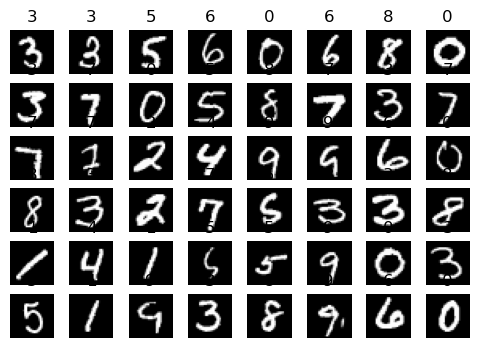

In [28]:
visualize_few_samples(train_dataset, cols = 8, rows = 6)

``Dataset``은 데이터 feature와 라벨을 한번에 하나씩 가져오는 기능을 제공한다. 하지만 보통 학습에서는 샘플들을 “minibatches”로 가져온고, 매 epoch마다 랜덤하게 섞어주며, multiprocessing을 사용해 데이터 획득을 빠르게 하고자 한다.

DataLoader이 복잡한 과정을 쉽도록 도와주는 iterable이다.

- 데이터로더는 데이터셋을 배치 단위로 묶어준다.
- ``shuffle``를 통해 매 epoch마다 랜덤하게 섞어주는 기능을 제공한다
- ``num_workers``를 통해 데이터 전처리를 multiprocessing으로 수행할 수 있다.

In [29]:
batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### 2. Network 정의하기

[PyTorch documentation](https://pytorch.org/docs/stable/nn.html)을 참고하여 3개의 레이어로 Multi-layer Perceptron모듈을 작성하라

In [30]:
class MultiLayerPerceptron(nn.Module):
    
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()

        self.flatten = nn.Flatten()
        
        ##### YOUR CODE START #####  
        # 1. First Layer
        #    - Linear layer with input size `in_dim` and output size `hidden_dim`
        #    - ReLU (Rectified Linear Unit) activation
        # 2. Second Layer:
        #    - Linear layer with input size `hidden_dim` and output size `hidden_dim`
        #    - ReLU (Rectified Linear Unit) activation
        # 3. Output Layer:
        #    - Linear layer with input size `hidden_dim` and output size `out_dim`
        #    - `out_dim` units represent the number of classes in a classification task
        # Use nn.Sequential() to stack these layers together.
        self.fc1 = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU()
        )

        self.fc2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        self.fc3 = nn.Linear(hidden_dim, out_dim)
        ##### YOUR CODE END #####

    def forward(self, x):
        x = self.flatten(x)

        ##### YOUR CODE START #####
        # Write a forward pass of your model
        x = self.fc1(x)
        x = self.fc2(x)
        logits = self.fc3(x)
        ##### YOUR CODE END #####

        return logits

model을 사용하기 위해 input data를 () 연산을 통해 전달하면, 이를 통해 ``forward`` 함수와 더불어 여러 작업들이 자동으로 수행된다.

직접 ``model.forward()``를 호출하지 말것!

In [32]:
# test if your model works with your input data
model = MultiLayerPerceptron(in_dim = 28*28, hidden_dim = 512, out_dim = 10)
print(model)

X = torch.rand(16, 1, 28, 28) # dummy data for testing with batch_size 16
logits = model(X) 
pred_prob = nn.Softmax(dim=1)(logits) # Predicted probability for each class with shape (batch_size, 10)
print(pred_prob.shape)
y_pred = pred_prob.argmax(axis = 1)
print(f"Predicted classes: {y_pred}")

MultiLayerPerceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): ReLU()
  )
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)
torch.Size([16, 10])
Predicted classes: tensor([1, 1, 1, 2, 2, 7, 6, 6, 6, 1, 2, 3, 1, 1, 1, 2])


우리 모델은 아래와 같이 구성된다:
- nn.Flatten: 이차원 28x28 이미지를 연속된 784 픽셀값을 가지는 1차원 텐서로 변환한다 (minibatch dimension (at dim=0)은 그대로 유지됨).
- nn.Linear: linear레이어는 입력에 대하여 learnable weights와 biases를 이용하여 선형 변환을 수행하는 모듈이다 (Fully connected layer)
- nn.ReLU: Non-linear activations. 선형 변환 후에 적용하여 비선형성을 추가하며, 모델이 다양한 분포를 학습할수 있도록 해준다.
- nn.Sequential: 순서가 있는 모듈의 컨테이너(container). 데이터는 컨테이너 내의 모든 모듈들을 정의된것과 같은 순서로 통과한다.
- nn.Softmax: MLP의 마지막 레이어는 [-infty, infty]에 분포하는 logit 값을 리턴한다. logit값은 nn.Softmax모듈에 전달되거 [0, 1]사이의 확률값으로 변환된다. dim 인자를 통해 어느 축의 값이 더해서 1이 될지 정한다.

정의한 모델은 그 내부에 parameter(weights and biases)를 갖고 있다.

Network를 정의할때 ``nn.Module``를 상속하게 되면 모델에 정의된 모든 파라미터를 자동으로 추적하며 ``parameters()`` 또는 ``named_parameters()`` 메서드를 통해 접근 가능해지게 된다.

In [33]:
for name, param in model.named_parameters():
    print(f"Layer: {name}\t| Size: {param.size()}\t| Values : {param[:2]} \n")

Layer: fc1.0.weight	| Size: torch.Size([512, 784])	| Values : tensor([[-0.0118, -0.0355, -0.0144,  ...,  0.0344,  0.0274, -0.0014],
        [ 0.0173, -0.0315,  0.0353,  ...,  0.0220,  0.0063,  0.0190]],
       grad_fn=<SliceBackward0>) 

Layer: fc1.0.bias	| Size: torch.Size([512])	| Values : tensor([-0.0225,  0.0007], grad_fn=<SliceBackward0>) 

Layer: fc2.0.weight	| Size: torch.Size([512, 512])	| Values : tensor([[ 0.0289, -0.0049,  0.0107,  ..., -0.0022,  0.0268, -0.0039],
        [-0.0122, -0.0429,  0.0214,  ...,  0.0082,  0.0187, -0.0356]],
       grad_fn=<SliceBackward0>) 

Layer: fc2.0.bias	| Size: torch.Size([512])	| Values : tensor([-0.0341, -0.0420], grad_fn=<SliceBackward0>) 

Layer: fc3.weight	| Size: torch.Size([10, 512])	| Values : tensor([[-0.0397,  0.0273, -0.0399,  ...,  0.0227, -0.0064, -0.0230],
        [ 0.0434,  0.0267, -0.0223,  ..., -0.0109,  0.0064, -0.0171]],
       grad_fn=<SliceBackward0>) 

Layer: fc3.bias	| Size: torch.Size([10])	| Values : tensor([-0.0116, 

### 3. Optimizing your model parameters

아래 코드를 통해 backward()를 수행시 모델 파라미터의 gradient가 계산되어 저장되는 것을 확인할 수 있다.

In [34]:
model = MultiLayerPerceptron(in_dim = 28*28, hidden_dim = 512, out_dim = 10)

X = torch.rand(16, 1, 28, 28) # dummy data with batch_size 16
logits = model(X) # forward pass return a logits with shape (batch_size, 10)

print("----- Parameters before backward() -----")
for name, param in model.named_parameters():
    print(f"Layer {name}\t| Size: {param.size()}\t| grad : {param.grad}")


y = torch.randint(10, (16,))
loss = nn.CrossEntropyLoss()(logits, y)
loss.backward()

print("\n----- Parameters after backward() -----")
for name, param in model.named_parameters():
    print(f"Layer {name}\t| Size: {param.size()}\t| grad : {param.grad.shape}")

----- Parameters before backward() -----
Layer fc1.0.weight	| Size: torch.Size([512, 784])	| grad : None
Layer fc1.0.bias	| Size: torch.Size([512])	| grad : None
Layer fc2.0.weight	| Size: torch.Size([512, 512])	| grad : None
Layer fc2.0.bias	| Size: torch.Size([512])	| grad : None
Layer fc3.weight	| Size: torch.Size([10, 512])	| grad : None
Layer fc3.bias	| Size: torch.Size([10])	| grad : None

----- Parameters after backward() -----
Layer fc1.0.weight	| Size: torch.Size([512, 784])	| grad : torch.Size([512, 784])
Layer fc1.0.bias	| Size: torch.Size([512])	| grad : torch.Size([512])
Layer fc2.0.weight	| Size: torch.Size([512, 512])	| grad : torch.Size([512, 512])
Layer fc2.0.bias	| Size: torch.Size([512])	| grad : torch.Size([512])
Layer fc3.weight	| Size: torch.Size([10, 512])	| grad : torch.Size([10, 512])
Layer fc3.bias	| Size: torch.Size([10])	| grad : torch.Size([10])


이제 parameter 업데이트를 통해 학습을 수행하자.

학습은 다음의 과정으로 구성된다.

for  each iteration (called an **epoch**):
- forward pass를 통하여 output (guess) 계산
- output과 target의 차이를 통해 error(loss)를 계산
- 파라미터에 대한 loss의 값의 미분 계산
- 경사하강법(gradient descent)를 통하여 파라미터 optimize

각 epoch은 다음의 과정으로 구성된다
- 학습 루프(Train Loop) - 학습 데이터를 수행하여 최적 파라미터를 학습한다
- Evaluation(Validation/Test) Loop - 평가 데이터셋을 순회하며 모델의 성능이 좋아지고 있는지 평가한다.

아직 이 과정이 익숙하지 않은 학생들은 [영상](https://www.youtube.com/watch?v=tIeHLnjs5U8)을 참고할것

<mark>과제</mark>
``train_loop``와 ``evaluation_loop``를 완성하라

In [35]:
def train_loop(model, device, dataloader, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() #Switch to train mode

    running_loss = 0.0
    for batch_idx, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        ##### YOUR CODE START #####
        # Forward propagation and compute loss
        logits = model(X)
        loss = loss_fn(logits, y)
        # Backpropagation and update parameter
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ##### YOUR CODE END #####
    
        running_loss += loss.item()

        if batch_idx % 300 == 0:
            print(f"Train loss: {loss.item():>7f}  [{(batch_idx + 1) * len(X):>5d}/{size:>5d}]")

    avg_train_loss = running_loss / len(dataloader)
    return(avg_train_loss)

In [36]:
def evaluation_loop(model, device, dataloader, loss_fn):    
    model.eval() # Set the model to evaluation mode. important for batch normalization and dropout layers

    test_loss, correct = 0.0, 0.0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            
            ##### YOUR CODE START #####
            # accumulate test_loss : sum of loss over mini-batches
            # accumulate correct : the number of correct prediction (hint: use argmax)
            logits = model(X)
            loss = loss_fn(logits, y)

            test_loss += loss.item()

            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            ##### YOUR CODE END #####

    avg_test_loss = test_loss / len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    print(f"\nTest Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {avg_test_loss:>8f} \n")

    return(avg_test_loss, accuracy)

### 4. 학습 수행

실제 학습 수행을 위해서는 hyperparameter를 지정해주어야 한다.
하이퍼 파라미터는 모델 학습 과정을 컨트롤 할수 있는 파라미터로, 모델 학습 및 수렴속도를 결정짓는 중요한 값들입니다.

- Number of Epochs: 데이터 전체를 반복할 횟수
- Batch Size: mini-batch 사이즈. 
- Learning Rate: 각 iteration마다 얼마나 모델 파라미터를 업데이트 할지.

``nn.CrossEntropyLoss``는 ``nn.LogSoftmax``와 ``nn.NLLLoss``를 합친 loss function이다

현재까지 배운것을 모두 합쳐 학습을 수행해보자.

In [37]:
def main():
    # Hyper parameters
    batch_size = 64
    learning_rate = 1e-3
    epochs = 40

    # training setting
    in_dim, hidden_dim, out_dim = 28*28, 512, 10
    save_model = True
    
    seed = 1
    torch.manual_seed(seed)

    device = "cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
    print(f"Using {device} device")


    train_dataset, test_dataset = load_MNIST_datasets("/datasets")
    
    train_dataloader = DataLoader(dataset= train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


    model = MultiLayerPerceptron(in_dim, hidden_dim, out_dim).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

    train_loss_list, test_loss_list, test_accuracy_list = [], [], []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loss = train_loop(model, device, train_dataloader, loss_fn, optimizer)
        test_loss, test_accuracy = evaluation_loop(model, device, test_dataloader, loss_fn)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        test_accuracy_list.append(test_accuracy)

    if save_model:
        torch.save(model.state_dict(), "model.pth")
        print("Saved Model State to model.pth")

    return train_loss_list, test_loss_list, test_accuracy_list

In [38]:
train_loss_list, test_loss_list, test_accuracy_list = main()

Using cuda:0 device
Epoch 1
-------------------------------
Train loss: 2.317879  [   64/60000]
Train loss: 2.287617  [19264/60000]
Train loss: 2.283307  [38464/60000]
Train loss: 2.270607  [57664/60000]

Test Accuracy: 38.2%, Avg loss: 2.257382 

Epoch 2
-------------------------------
Train loss: 2.261548  [   64/60000]
Train loss: 2.241510  [19264/60000]
Train loss: 2.221212  [38464/60000]
Train loss: 2.186979  [57664/60000]

Test Accuracy: 54.6%, Avg loss: 2.192159 

Epoch 3
-------------------------------
Train loss: 2.188418  [   64/60000]
Train loss: 2.182716  [19264/60000]
Train loss: 2.114133  [38464/60000]
Train loss: 2.084499  [57664/60000]

Test Accuracy: 63.1%, Avg loss: 2.081116 

Epoch 4
-------------------------------
Train loss: 2.059048  [   64/60000]
Train loss: 2.025636  [19264/60000]
Train loss: 1.990442  [38464/60000]
Train loss: 1.946402  [57664/60000]

Test Accuracy: 67.4%, Avg loss: 1.890470 

Epoch 5
-------------------------------
Train loss: 1.984168  [   64

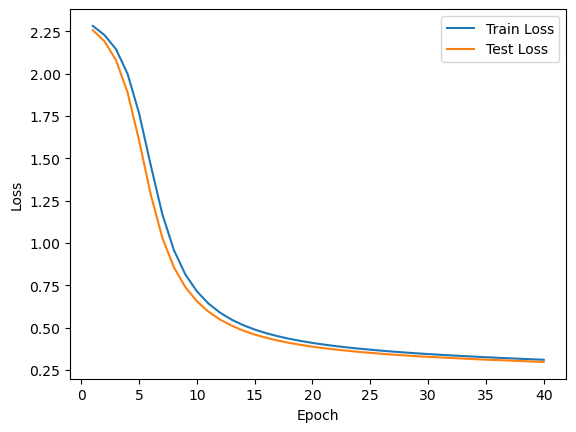

In [39]:
epochs_range = [i for i in range(1, len(train_loss_list) + 1)]
plt.plot(epochs_range, train_loss_list, label='Train Loss')
plt.plot(epochs_range, test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show ()


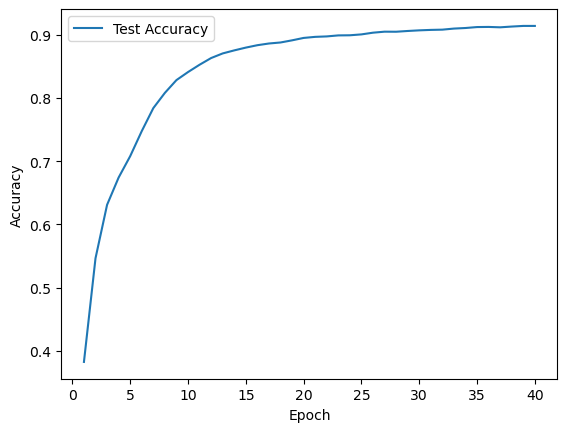

In [40]:
epochs_range = [i for i in range(1, len(train_loss_list) + 1)]
plt.plot(epochs_range, test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show ()

In [41]:
model = MultiLayerPerceptron(28*28, 512, 10)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

Predicted: "tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3])"
Actual: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


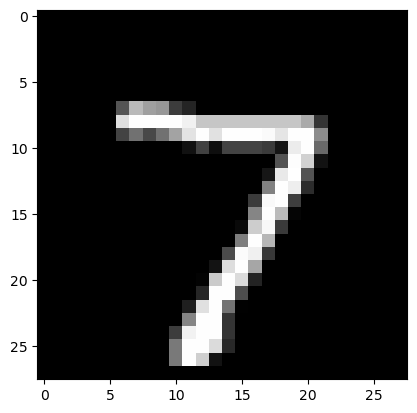

Label: 7
Predicted label: 7


In [42]:
model.eval()

with torch.no_grad():
    X, y = next(iter(test_dataloader))
    logits = model(X)
    y_pred = logits.argmax(dim = 1)

    print(f'Predicted: "{y_pred}"')
    print(f"Actual: {y}")

    # display single example
    img = X[0].squeeze()
    label = y[0]
    pred_label = y_pred[0]
    plt.imshow(img, cmap="gray")
    plt.show()
    print(f"Label: {label}")
    print(f"Predicted label: {pred_label}")